In [1]:
# !pip3 install kafka-python==1.4.7 streamz==0.5.2 --user

In [2]:
import os
import sys

SOURCE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
sys.path.insert(0, SOURCE_DIR)

In [3]:
from time import sleep, time
from streamz import Stream

def inc(x):
    sleep(1)
    return x + 1

source = Stream()
source.map(inc).sink(print)

Output()

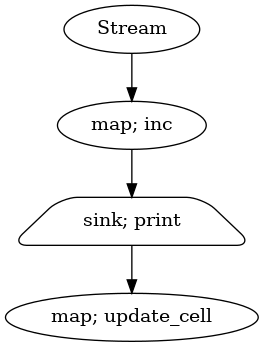

In [4]:
source.visualize()

In [5]:
import waterhealer as wh

source = wh.source.metrics(source = source)

In [ ]:
source.emit(3)

In [ ]:
import requests
from prometheus_client.parser import text_string_to_metric_families

metrics = requests.get('http://localhost:8000/').content
for family in text_string_to_metric_families(metrics.decode()):
    for sample in family.samples:
        print("Name: {0} Labels: {1} Value: {2}".format(*sample))